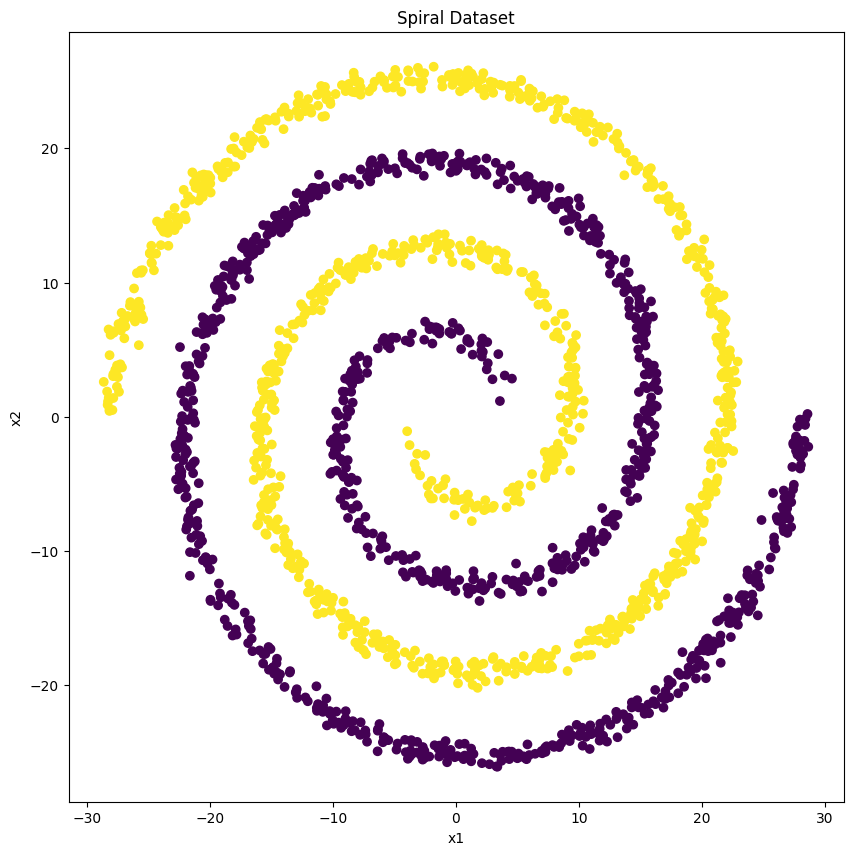

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points=1000, noise=0.5):
    theta = torch.sqrt(torch.rand(n_points)) * 4 * np.pi
    
    r_a = 2 * theta + np.pi
    data_a = torch.stack([torch.cos(theta) * r_a, torch.sin(theta) * r_a], dim=1)
    x_a = data_a + torch.randn(n_points, 2) * noise
    y_a = torch.zeros(n_points, 1)

    r_b = -2 * theta - np.pi
    data_b = torch.stack([torch.cos(theta) * r_b, torch.sin(theta) * r_b], dim=1)
    x_b = data_b + torch.randn(n_points, 2) * noise
    y_b = torch.ones(n_points, 1)

    return torch.cat([x_a, x_b]), torch.cat([y_a, y_b])

X, y = generate_spiral_data()

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Spiral Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Epoch [10/100], Test Loss: 0.6073, Test Accuracy: 0.6000
Epoch [20/100], Test Loss: 0.5020, Test Accuracy: 0.7145
Epoch [30/100], Test Loss: 0.0283, Test Accuracy: 0.9990
Epoch [40/100], Test Loss: 0.0062, Test Accuracy: 0.9995
Epoch [50/100], Test Loss: 0.0016, Test Accuracy: 0.9995
Epoch [60/100], Test Loss: 0.0005, Test Accuracy: 1.0000
Epoch [70/100], Test Loss: 0.0002, Test Accuracy: 1.0000
Epoch [80/100], Test Loss: 0.0001, Test Accuracy: 1.0000
Epoch [90/100], Test Loss: 0.0001, Test Accuracy: 1.0000
Epoch [100/100], Test Loss: 0.0000, Test Accuracy: 1.0000


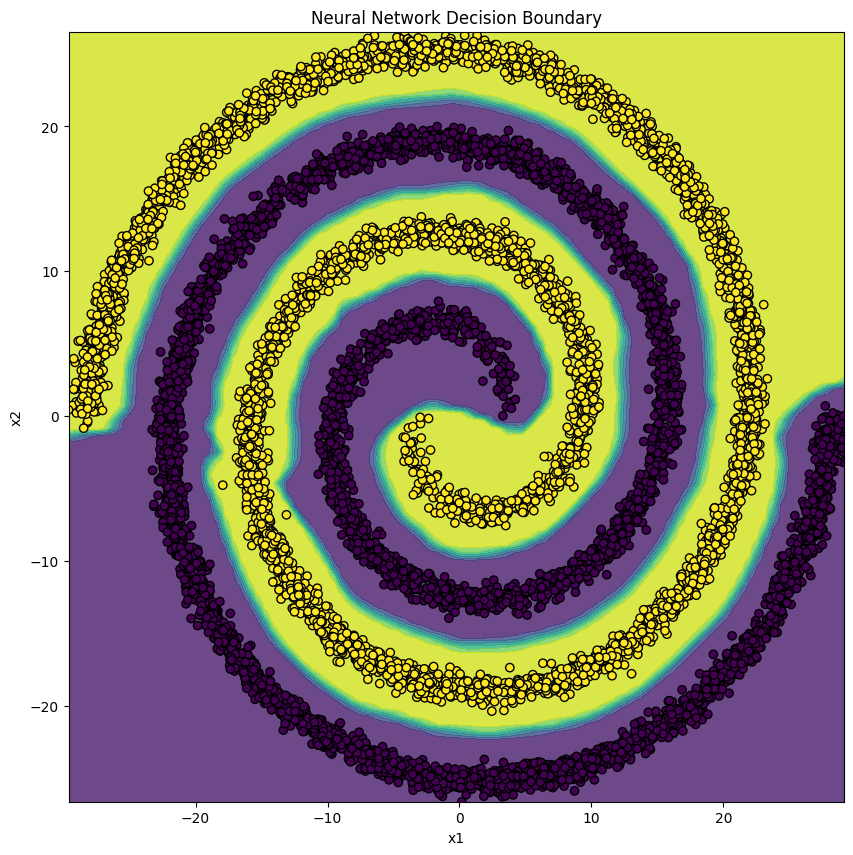

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Generate data
X, y = generate_spiral_data(n_points=5000, noise=0.5)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class SpiralNet(nn.Module):
    def __init__(self):
        super(SpiralNet, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SpiralNet()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            accuracy = ((test_outputs > 0.5) == y_test).float().mean()
            print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy.item():.4f}')

# Visualize the decision boundary
model.eval()
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = model(grid).reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black')
plt.title('Neural Network Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()